In [274]:
import sys
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [275]:
book_dtf = pd.read_csv("NLTK.csv")

In [276]:
#tells us how/what format numpy objects are printed
np.set_printoptions(threshold=sys.maxsize)


In [284]:
# train and test data splitting into 85% and 15%
Train_X,Test_X, Train_Y, Test_Y = train_test_split(DataF.drop(columns=["Popularity"]), 
                                                    DataF["Popularity"],
                                                    test_size = 0.15,
                                                    random_state = 229)

In [285]:
#First Subset is just non-Textual features, Second Subset is Textual and Non Textual Features 
#Third Subset is only Non Textual Features
#splitting our features where Popularity is our dependent variable and the others our the indepedent variables predicting the dependent variable 
First_Subset = ["User_Reviews","Stars_Ratings","Diff_Ratings"]
Third_Subset = ["User_Reviews","Stars_Ratings","Diff_Ratings",
            "Num_Tokenized_Words","Average_WordLength","Average_WordsinSentence","Percentage_Verbs",
            "Percentage_Nouns","Percentage_AdjAdverb","Quote","Sentiment_Score"]


In [286]:
DataF.columns = DataF.columns.to_series().apply(lambda x: x.strip())

In [287]:
# Creating Logisitic Regression classifier object, fittting the model with data on train set and predicting based on test set
# training our data where we add a column of ones to the array Subset 1
LogisticRegression_Var = sm.Logit(Train_Y, sm.add_constant(Train_X[First_Subset])).fit()

C:\Users\varsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.455958
         Iterations 6


In [288]:
#Predicting based on train data set 
y_train_pred=LogisticRegression_Var.predict(sm.add_constant(Train_X[First_Subset]))
y_train_pred=list(map(round,y_train_pred))

<AxesSubplot:>

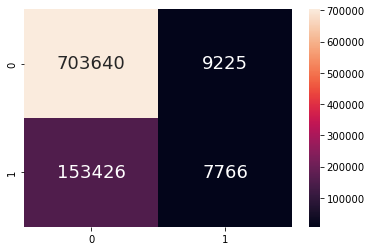

In [289]:
# Plot the two-way Confusion Matrix
import seaborn as sb
sb.heatmap(confusion_matrix(Train_Y, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [290]:
confusion_matrix_train = confusion_matrix(Train_Y, y_train_pred)
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_train[1][1]+confusion_matrix_train[0][0])/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]+confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_train[0][0]/(confusion_matrix_train[0][0]+ confusion_matrix_train[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_train[0][1]/(confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_train[1][0]/(confusion_matrix_train[1][0]+confusion_matrix_train[1][1])

print("Train Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Train Data:
Accuracy  :	 0.8139125938010908
TPR Train :	 0.048178569656062334
TNR Train :	 0.9870592608698702
FPR Train :	 0.012940739130129829
FNR Train :	 0.9518214303439376


We observe a high TNR and a High FNR. The TPR and FPR are low. High TNR indicates a higher percentage of the model predicting review is not popular meanwhile Low TPR means lower percentage of the model predicting tthe review is popular

High FNR theres a high chance that popular reviews is predicted as not-popular (maybe because of distribution again) Low FPR means theres a low chance that not-popular reviews is predicted as popular

In [291]:
print(LogisticRegression_Var.summary())

                           Logit Regression Results                           
Dep. Variable:             Popularity   No. Observations:               874057
Model:                          Logit   Df Residuals:                   874053
Method:                           MLE   Df Model:                            3
Date:                Fri, 22 Apr 2022   Pseudo R-squ.:                 0.04617
Time:                        17:55:16   Log-Likelihood:            -3.9853e+05
converged:                       True   LL-Null:                   -4.1782e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.1262      0.038     29.588      0.000       1.052       1.201
User_Reviews      0.0016   8.92e-06    175.171      0.000       0.002       0.002
Stars_Ratings    -0.7409      0.010    -

In [292]:
# making our prediction on Test set, adding of constant column ensures that we have a consistent set of variables . checking how good our predicition is on Test set
X_Test= Test_X[First_Subset]
PredictingVar = LogisticRegression_Var.predict(sm.add_constant(X_Test))
PredictingVar = list(map(round,PredictingVar))

C:\Users\varsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [293]:
DataF.select_dtypes(include=['object']).columns.tolist()

['Tokenized_Words']

<AxesSubplot:>

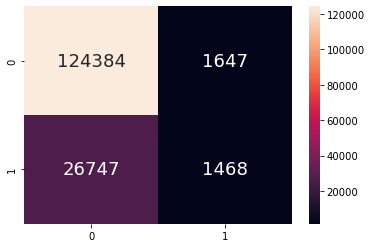

In [294]:
# Plot the two-way Confusion Matrix
import seaborn as sb
sb.heatmap(confusion_matrix(Test_Y, PredictingVar), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [295]:
confusion_matrix_test = confusion_matrix(Test_Y, PredictingVar)

In [296]:
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_test[1][1]+confusion_matrix_test[0][0])/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]+confusion_matrix_test[0][1]+confusion_matrix_test[0][0])


In [297]:
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0])

In [298]:
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_test[0][0]/(confusion_matrix_test[0][0]+ confusion_matrix_test[0][1])

In [299]:
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_test[0][1]/(confusion_matrix_test[0][1]+confusion_matrix_test[0][0])

In [300]:
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_test[1][0]/(confusion_matrix_test[1][0]+confusion_matrix_test[1][1])

In [301]:
print("Test Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Test Data:
Accuracy  :	 0.8159174305978761
TPR Train :	 0.05202906255537834
TNR Train :	 0.9869317866239259
FPR Train :	 0.013068213376074141
FNR Train :	 0.9479709374446217


ANALYSIS OF PREDICTION BASED ON TEST DATA:
Overfitting does not take place as our values are similar to ones obtained in our analysis of Train data

USING TEXTUAL FEATURES: SUBSET 2

In [302]:
 Second_Subset=["Num_Tokenized_Words","Average_WordLength","Average_WordsinSentence","Percentage_Verbs",
            "Percentage_Nouns","Percentage_AdjAdverb","Quote","Sentiment_Score"]

In [303]:
#Split the dataset into 85% train set and 15% test set
#Integer is inserted to random_state to reproduce the same split everytime it is run
X_train, X_test, y_train, y_test = train_test_split(DataF.drop(columns=["Popularity"]), DataF["Popularity"],
                                                    test_size = 0.15, random_state = 229)

In [304]:
DataF.columns = DataF.columns.to_series().apply(lambda x: x.strip())

In [305]:
# Creating Logisitic Regression classifier object, fittting the model with data on train set and predicting based on test set
# training our data where we add a column of ones to the array Subset 1
LogisticRegression_Var = sm.Logit(y_train, sm.add_constant(X_train[Second_Subset])).fit()

C:\Users\varsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.462236
         Iterations 6


In [306]:
#Predicting based on train data set 
y_train_pred=LogisticRegression_Var.predict(sm.add_constant(X_train[Second_Subset]))
y_train_pred=list(map(round,y_train_pred))

<AxesSubplot:>

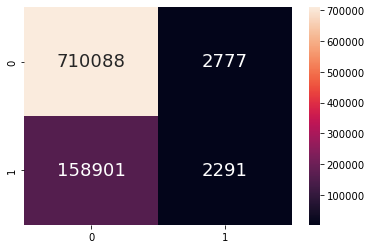

In [307]:
# Plot the two-way Confusion Matrix
import seaborn as sb
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [308]:
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_train[1][1]+confusion_matrix_train[0][0])/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]+confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_train[0][0]/(confusion_matrix_train[0][0]+ confusion_matrix_train[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_train[0][1]/(confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_train[1][0]/(confusion_matrix_train[1][0]+confusion_matrix_train[1][1])

print("Train Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Train Data:
Accuracy  :	 0.8150257935123224
TPR Train :	 0.01421286416199315
TNR Train :	 0.9961044517545398
FPR Train :	 0.0038955482454602203
FNR Train :	 0.9857871358380068


In [309]:
# making our prediction on Test set, adding of constant column ensures that we have a consistent set of variables . checking how good our predicition is on Test set
X_Test= X_test[Second_Subset]
PredictingVar = LogisticRegression_Var.predict(sm.add_constant(X_Test))
PredictingVar = list(map(round,PredictingVar))

C:\Users\varsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:>

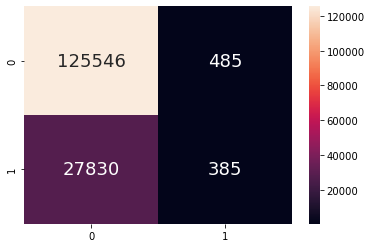

In [310]:
# Plot the two-way Confusion Matrix
import seaborn as sb
sb.heatmap(confusion_matrix(y_test, PredictingVar), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [311]:
confusion_matrix_test = confusion_matrix(y_test, PredictingVar)

In [312]:
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_test[1][1]+confusion_matrix_test[0][0])/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]+confusion_matrix_test[0][1]+confusion_matrix_test[0][0])


In [313]:
#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_test[1][1]+confusion_matrix_test[0][0])/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]+confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_test[0][0]/(confusion_matrix_test[0][0]+ confusion_matrix_test[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_test[0][1]/(confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_test[1][0]/(confusion_matrix_test[1][0]+confusion_matrix_test[1][1])

print("Test Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Test Data:
Accuracy  :	 0.8164295994709749
TPR Train :	 0.01364522417153996
TNR Train :	 0.9961517404448113
FPR Train :	 0.0038482595551888026
FNR Train :	 0.98635477582846


Analysis of train and test data of Textual characteristics
Both have high TNR and FNR, and low TPR and FPR

Analysis of Textual and Non-Textual prediction
Both exhibit same characteristics (high in TNR and FNR, as well as lower in TPR and FPR)

Accuracy of prediction with Non-Textual prediction is generally higher (0.82) compared to Textual charactertics(0.81).

However, Textual prediction has a higher TNR (0.99) and FNR (0.985) compared to Non-textual prediction 

Textual prediction has much lower TPR and FPR compared to Non-textual prediction TPR (0.14) and FPR (0.003)

This suggest that non-Textual prediction is better at sorting popular reviews 

It has higher TPR - higher percentage of model predicting correctly when review is popular
And lower FNR - less mistake of mis-predicting the popular review as notTex-popular
Textual-Reviews on the other hand is much better at handling non-popular reviews

Higher TNR - higher percentage of model predicting correctly when review isn't popular
and Lower FNR - which means less mistake of mis-predicting non-popular review as popular
Conclusion:
If we were to choose between Textual or Non-Textual characteristics for prediction, Non-Textual characteritics is better, because it generally has a higher accuracy. Plus, its more accurate in their prediction when the review is popular, when only 18.2% of our dataset is of popular reviews (highly undersampled)

COMBINATION OF BOTH NON TEXTUAL AND TEXTUAL

In [314]:
Third_Subset = ["User_Reviews","Stars_Ratings","Diff_Ratings",
            "Num_Tokenized_Words","Average_WordLength","Average_WordsinSentence","Percentage_Verbs",
            "Percentage_Nouns","Percentage_AdjAdverb","Quote","Sentiment_Score"]

In [315]:
#Split the dataset into 85% train set and 15% test set
#Integer is inserted to random_state to reproduce the same split everytime it is run
X_train, X_test, y_train, y_test = train_test_split(DataF.drop(columns=["Popularity"]), DataF["Popularity"],
                                                    test_size = 0.15, random_state = 229)

In [316]:
DataF.columns = DataF.columns.to_series().apply(lambda x: x.strip())

In [317]:
# Creating Logisitic Regression classifier object, fittting the model with data on train set and predicting based on test set
# training our data where we add a column of ones to the array Subset 1
LogisticRegression_Var = sm.Logit(y_train, sm.add_constant(X_train[Third_Subset])).fit()

C:\Users\varsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.444957
         Iterations 6


In [318]:
#Predicting based on train data set 
y_train_pred=LogisticRegression_Var.predict(sm.add_constant(X_train[Third_Subset]))
y_train_pred=list(map(round,y_train_pred))

<AxesSubplot:>

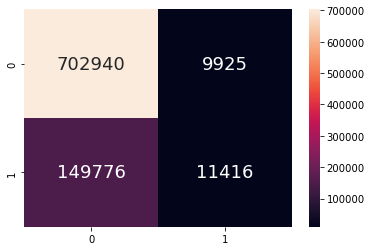

In [319]:
# Plot the two-way Confusion Matrix
import seaborn as sb
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [320]:
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_train[1][1]+confusion_matrix_train[0][0])/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]+confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_train[0][0]/(confusion_matrix_train[0][0]+ confusion_matrix_train[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_train[0][1]/(confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_train[1][0]/(confusion_matrix_train[1][0]+confusion_matrix_train[1][1])

print("Train Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Train Data:
Accuracy  :	 0.8172876597292854
TPR Train :	 0.07082237331877513
TNR Train :	 0.9860773077651449
FPR Train :	 0.013922692234855127
FNR Train :	 0.9291776266812248


In [321]:
# making our prediction on Test set, adding of constant column ensures that we have a consistent set of variables . checking how good our predicition is on Test set
X_Test= X_test[Third_Subset]
PredictingVar = LogisticRegression_Var.predict(sm.add_constant(X_Test))
PredictingVar = list(map(round,PredictingVar))

C:\Users\varsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:>

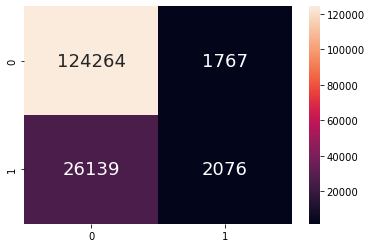

In [322]:
# Plot the two-way Confusion Matrix
import seaborn as sb
sb.heatmap(confusion_matrix(y_test, PredictingVar), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [323]:
confusion_matrix_test = confusion_matrix(y_test, PredictingVar)

In [324]:
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_test[1][1]+confusion_matrix_test[0][0])/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]+confusion_matrix_test[0][1]+confusion_matrix_test[0][0])


In [325]:
#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_test[1][1]+confusion_matrix_test[0][0])/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]+confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_test[0][0]/(confusion_matrix_test[0][0]+ confusion_matrix_test[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_test[0][1]/(confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_test[1][0]/(confusion_matrix_test[1][0]+confusion_matrix_test[1][1])

print("Test Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Test Data:
Accuracy  :	 0.8190812079405625
TPR Train :	 0.0735778841041999
TNR Train :	 0.9859796399298585
FPR Train :	 0.014020360070141473
FNR Train :	 0.9264221158958001


Analysis of training and testing set for Non-Textual and Textual prediction
Has quite high TNR and FNR, and low TPR as well as FPR.

Comparison of of Textual, Non-Textual, and Textual+Non-Textual prediction
Both exhibit same characteristics (high in TNR and FNR, as well as lower in TPR and FPR)

Accuracy of prediction is highest with Textual+Non-Textual prediction.

Conclusion:
Accuracy of prediction is highest with Textual+Non-Textual prediction.

UNDERSAMPLING NON TEXTUAL

In [326]:
#Undersampling our train data 
import numpy as np
Size_y_train_major = len(y_train[y_train==0])
Size_y_train_minor = len(y_train[y_train==1])
Size_y_train_indices = y_train[y_train==0].index
# generate random number where seed is used to generate the same random number again 
randomint = np.random.default_rng(seed=229)
index_tobedropped = randomint.choice(Size_y_train_indices, Size_y_train_major-Size_y_train_minor, replace=False)
X_train = X_train.drop(index_tobedropped)
y_train = y_train.drop(index_tobedropped)

NON-Textual Subset

In [327]:
# creating Logisitic Regression object and training our data 
logisticRegressionVar = sm.Logit(y_train, sm.add_constant(X_train[First_Subset])).fit()


C:\Users\varsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.656750
         Iterations 5


Train Data:
Accuracy  :	 0.617245272718249
TPR Train :	 0.49220184624547125
TNR Train :	 0.7422886991910268
FPR Train :	 0.25771130080897314
FNR Train :	 0.5077981537545287


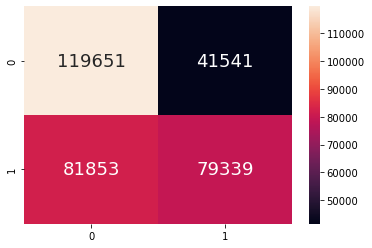

In [328]:
PredictingVar = logisticRegressionVar.predict(sm.add_constant(X_train[First_Subset]))
PredictingVar = list(map(round,PredictingVar))
# Plot the two-way Confusion Matrix
import seaborn as sb
sb.heatmap(confusion_matrix(y_train, PredictingVar), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
confusion_matrix_train = confusion_matrix(y_train,PredictingVar )
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_train[1][1]+confusion_matrix_train[0][0])/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]+confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_train[0][0]/(confusion_matrix_train[0][0]+ confusion_matrix_train[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_train[0][1]/(confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_train[1][0]/(confusion_matrix_train[1][0]+confusion_matrix_train[1][1])

print("Train Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

In [329]:
PredictingVar = logisticRegressionVar.predict(sm.add_constant(X_test[First_Subset]))
PredictingVar = list(map(round,PredictingVar))

C:\Users\varsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:>

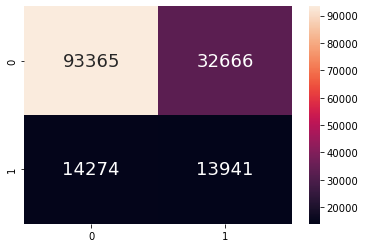

In [330]:
# Plot the two-way Confusion Matrix
import seaborn as sb
sb.heatmap(confusion_matrix(y_test, PredictingVar), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [331]:
confusion_matrix_test = confusion_matrix(y_test, PredictingVar)
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_test[1][1]+confusion_matrix_test[0][0])/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]+confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_test[0][0]/(confusion_matrix_test[0][0]+ confusion_matrix_test[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_test[0][1]/(confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_test[1][0]/(confusion_matrix_test[1][0]+confusion_matrix_test[1][1])

print("Test Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

Test Data:
Accuracy  :	 0.6956809252752097
TPR Train :	 0.49409888357256776
TNR Train :	 0.7408098007633043
FPR Train :	 0.25919019923669573
FNR Train :	 0.5059011164274322


TEXTUAL SUBSET UNDERSAMPLING

C:\Users\varsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.665682
         Iterations 5
Train Data:
Accuracy  :	 0.5986401310238721
TPR Train :	 0.5566653431932106
TNR Train :	 0.6406149188545337
FPR Train :	 0.3593850811454663
FNR Train :	 0.4433346568067894


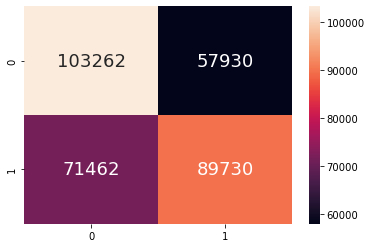

In [332]:
Size_y_train_major = len(y_train[y_train==0])
Size_y_train_minor = len(y_train[y_train==1])
Size_y_train_indices = y_train[y_train==0].index
# generate random number where seed is used to generate the same random number again 
randomint = np.random.default_rng(seed=200)
index_tobedropped = randomint.choice(Size_y_train_indices, Size_y_train_major-Size_y_train_minor, replace=False)
X_train = X_train.drop(index_tobedropped)
y_train = y_train.drop(index_tobedropped)

# creating Logisitic Regression object and training our data 
logisticRegressionVar = sm.Logit(y_train, sm.add_constant(X_train[Second_Subset])).fit()

PredictingVar = logisticRegressionVar.predict(sm.add_constant(X_train[Second_Subset]))
PredictingVar = list(map(round,PredictingVar))
# Plot the two-way Confusion Matrix
import seaborn as sb
sb.heatmap(confusion_matrix(y_train, PredictingVar), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
confusion_matrix_train = confusion_matrix(y_train,PredictingVar )
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_train[1][1]+confusion_matrix_train[0][0])/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]+confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_train[0][0]/(confusion_matrix_train[0][0]+ confusion_matrix_train[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_train[0][1]/(confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_train[1][0]/(confusion_matrix_train[1][0]+confusion_matrix_train[1][1])

print("Train Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)


C:\Users\varsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Test Data:
Accuracy  :	 0.6247098790244155
TPR Train :	 0.5588516746411484
TNR Train :	 0.6394537851798368
FPR Train :	 0.3605462148201633
FNR Train :	 0.4411483253588517


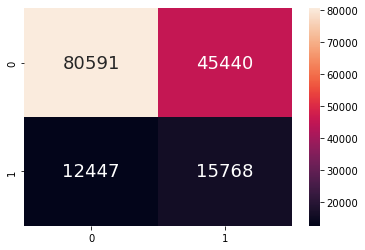

In [333]:
PredictingVar = logisticRegressionVar.predict(sm.add_constant(X_test[Second_Subset]))
PredictingVar = list(map(round,PredictingVar))

# Plot the two-way Confusion Matrix
import seaborn as sb
sb.heatmap(confusion_matrix(y_test, PredictingVar), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

confusion_matrix_test = confusion_matrix(y_test, PredictingVar)
#Calculate accuracy of the prediction on train data

confusion_matrix_test = confusion_matrix(y_test, PredictingVar)
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_test[1][1]+confusion_matrix_test[0][0])/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]+confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_test[0][0]/(confusion_matrix_test[0][0]+ confusion_matrix_test[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_test[0][1]/(confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_test[1][0]/(confusion_matrix_test[1][0]+confusion_matrix_test[1][1])

print("Test Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)

 UNDERSAMPLING TEXTUAL AND NON TEXTUAL SUBSET 

C:\Users\varsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.639194
         Iterations 5
Train Data:
Accuracy  :	 0.6340699290287359
TPR Train :	 0.5675033500421857
TNR Train :	 0.7006365080152861
FPR Train :	 0.2993634919847139
FNR Train :	 0.4324966499578143


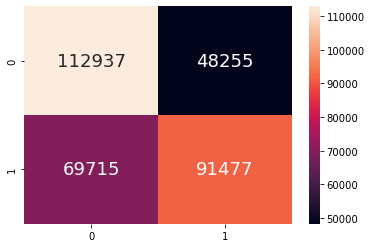

In [334]:
Size_y_train_major = len(y_train[y_train==0])
Size_y_train_minor = len(y_train[y_train==1])
Size_y_train_indices = y_train[y_train==0].index
# generate random number where seed is used to generate the same random number again 
randomint = np.random.default_rng(seed=200)
index_tobedropped = randomint.choice(Size_y_train_indices, Size_y_train_major-Size_y_train_minor, replace=False)
X_train = X_train.drop(index_tobedropped)
y_train = y_train.drop(index_tobedropped)

# creating Logisitic Regression object and training our data 
logisticRegressionVar = sm.Logit(y_train, sm.add_constant(X_train[Third_Subset])).fit()

PredictingVar = logisticRegressionVar.predict(sm.add_constant(X_train[Third_Subset]))
PredictingVar = list(map(round,PredictingVar))
# Plot the two-way Confusion Matrix
import seaborn as sb
sb.heatmap(confusion_matrix(y_train, PredictingVar), 
           annot = True, fmt=".0f", annot_kws={"size": 18})
confusion_matrix_train = confusion_matrix(y_train,PredictingVar )
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_train[1][1]+confusion_matrix_train[0][0])/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0]+confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_train[1][1]/(confusion_matrix_train[1][1]+confusion_matrix_train[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_train[0][0]/(confusion_matrix_train[0][0]+ confusion_matrix_train[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_train[0][1]/(confusion_matrix_train[0][1]+confusion_matrix_train[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_train[1][0]/(confusion_matrix_train[1][0]+confusion_matrix_train[1][1])

print("Train Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)


C:\Users\varsh\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Test Data:
Accuracy  :	 0.6736122816799139
TPR Train :	 0.5661881977671451
TNR Train :	 0.6976616864104863
FPR Train :	 0.3023383135895137
FNR Train :	 0.43381180223285487


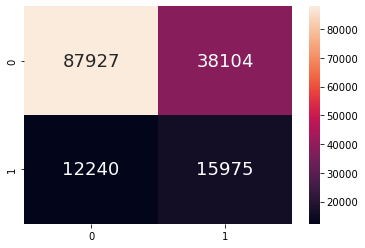

In [335]:
PredictingVar = logisticRegressionVar.predict(sm.add_constant(X_test[Third_Subset]))
PredictingVar = list(map(round,PredictingVar))

# Plot the two-way Confusion Matrix
import seaborn as sb
sb.heatmap(confusion_matrix(y_test, PredictingVar), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

confusion_matrix_test = confusion_matrix(y_test, PredictingVar)
#Calculate accuracy of the prediction on train data

confusion_matrix_test = confusion_matrix(y_test, PredictingVar)
#Calculate accuracy of the prediction on train data

#Accuracy = (TP+TN)/Total data
accuracy = (confusion_matrix_test[1][1]+confusion_matrix_test[0][0])/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0]+confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#TPR (True Positive Rate) = TP/(TP+FN)
TPR = confusion_matrix_test[1][1]/(confusion_matrix_test[1][1]+confusion_matrix_test[1][0])
#TNR (True Negative Rate) = TN/(TN+FP)
TNR = confusion_matrix_test[0][0]/(confusion_matrix_test[0][0]+ confusion_matrix_test[0][1])
#FPR (False Positive Rate) = FP/(TN+FP)
FPR = confusion_matrix_test[0][1]/(confusion_matrix_test[0][1]+confusion_matrix_test[0][0])
#FNR (False Negative Rate) = FN/(TP+FN)
FNR = confusion_matrix_test[1][0]/(confusion_matrix_test[1][0]+confusion_matrix_test[1][1])

print("Test Data:")
print("Accuracy  :\t", accuracy)
print("TPR Train :\t", TPR)
print("TNR Train :\t", TNR)
print("FPR Train :\t", FPR)
print("FNR Train :\t", FNR)